In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")


In [3]:
df.head(20)

,Unnamed: 0,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type
0,1,9711,1489,21,208.0,NaN,moblie
1,2,50073,18199,40,475.0,1954.0,moblie
2,3,21784,745,47,1493.0,2252.0,moblie
3,4,18159,1662,21,244.0,2067.0,moblie
4,5,1439,659,749,2357.0,5083.0,moblie
5,6,13498,3525,37,598.0,1023.0,moblie
6,7,181395,3546,19,489.0,873.0,moblie
7,8,214,117,18,22.0,32.0,moblie
8,9,31785,8471,50,NaN,NaN,moblie
9,10,12451,1797,30,NaN,NaN,moblie


In [4]:
df['net_type'].unique()

array(['moblie', 'fixed'], dtype=object)

In [5]:
df.rename(columns = {"Unnamed: 0": "ID"}, inplace = True)

idx = 0

for i in df.index:
    df.loc[i, 'ID'] = idx
    idx += 1

    if df.loc[i, 'net_type'] != 'fixed':
        df.loc[i, 'net_type'] = 'mobile'


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               20000 non-null  int64  
 1   avg_d_kbps       20000 non-null  int64  
 2   avg_u_kbps       20000 non-null  int64  
 3   avg_lat_ms       20000 non-null  int64  
 4   avg_lat_down_ms  19097 non-null  float64
 5   avg_lat_up_ms    19127 non-null  float64
 6   net_type         20000 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.1+ MB


In [7]:
def find_nulls(df, drop):
    
    if drop:
        data = df.drop(columns=['derived_lat_up', 'derived_lat_down'])
    else:
        data = df
    
    nulls = data.isnull().sum()
    print(nulls)
    count = 0
    
    for i in data.index:

        if data.loc[i].isnull().sum() > 0:
            count += 1

    print('The', count, 'nulls is', round((count / len(df.index)) * 100, 2), '% of the dataset')



find_nulls(df, False)

ID                   0
avg_d_kbps           0
avg_u_kbps           0
avg_lat_ms           0
avg_lat_down_ms    903
avg_lat_up_ms      873
net_type             0
dtype: int64
The 970 nulls is 4.85 % of the dataset


Trying pandas Interpolate()

In [8]:
df2 = df.copy()
df2['avg_lat_up_ms'] = df2['avg_lat_up_ms'].interpolate(method = 'slinear', limit_direction = 'both')
df2['avg_lat_down_ms'] = df2['avg_lat_down_ms'].interpolate(method = 'slinear', limit_direction = 'both')

find_nulls(df2, False)

ID                 0
avg_d_kbps         0
avg_u_kbps         0
avg_lat_ms         0
avg_lat_down_ms    0
avg_lat_up_ms      1
net_type           0
dtype: int64
The 1 nulls is 0.01 % of the dataset


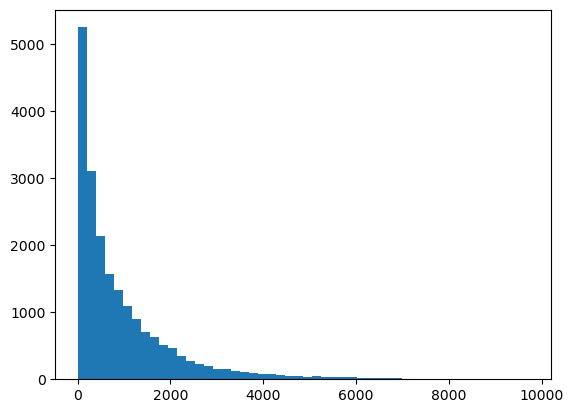

In [9]:
x = df2['avg_lat_up_ms']
plt.hist(x, bins = 50)
plt.xlabel = 'avg_lat_up_ms'
plt.ylabel = 'frequency'

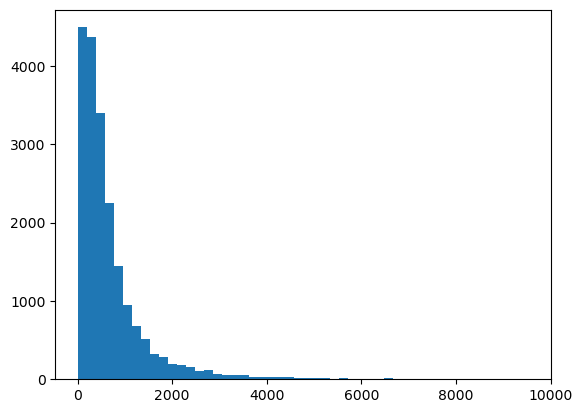

In [10]:
x = df2['avg_lat_down_ms']
plt.hist(x, bins = 50)
plt.xlabel = 'avg_lat_down_ms'
plt.ylabel = 'frequency'

Using polyfit() to find line of best fit

In [11]:
df_num = df.drop(columns=['net_type'])
corr = df_num.corr()
corr.style.background_gradient(cmap = 'viridis').format(precision = 3)

,ID,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms
ID,1.000,0.241,0.279,-0.088,-0.314,-0.367
avg_d_kbps,0.241,1.000,0.550,-0.160,-0.257,-0.351
avg_u_kbps,0.279,0.550,1.000,-0.146,-0.222,-0.275
avg_lat_ms,-0.088,-0.160,-0.146,1.000,0.294,0.203
avg_lat_down_ms,-0.314,-0.257,-0.222,0.294,1.000,0.418
avg_lat_up_ms,-0.367,-0.351,-0.275,0.203,0.418,1.000


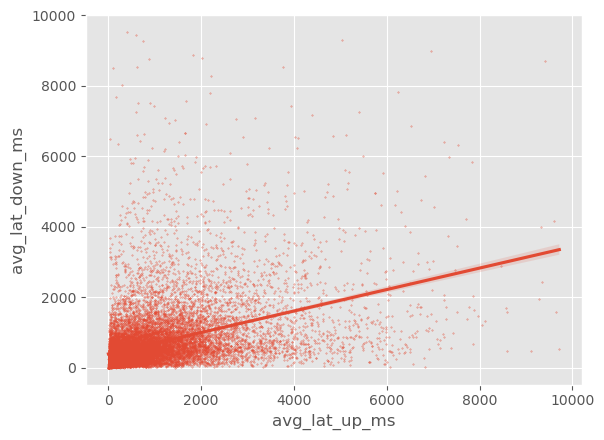

In [12]:
plt.style.use('ggplot')
sns.regplot(x = df['avg_lat_up_ms'], y = df['avg_lat_down_ms'], scatter_kws = {'s':0.1})
plt.show()

#Shows a rough positive correlation

In [13]:
#dfnn: dataframe not null
dfnn = df.dropna(subset = ['avg_lat_up_ms', 'avg_lat_down_ms'])

In [14]:
#Creates linear equations using the correlation between the two attributes
x = dfnn['avg_lat_up_ms']
y = dfnn['avg_lat_down_ms']
m_1, c_1 = np.polyfit(x, y, 1)
m_2, c_2 = np.polyfit(y, x, 1)
print('y = ', m_1, 'x + ', c_1)
print('y = ', m_2, 'x + ', c_2)

y =  0.30477718900317413 x +  391.7214511806504
y =  0.5721187325806826 x +  537.4791220967825


In [15]:
#Fills nulls

df = df.reindex(columns = df.columns.tolist() + ['derived_lat_down', 'derived_lat_up'])

null_mat_down = df['avg_lat_down_ms'].isnull()
null_mat_up = df['avg_lat_up_ms'].isnull()

df.sort_values(by=['avg_lat_ms'])
df.head()

for i in df.index:

    if not null_mat_down[i] and not null_mat_up[i]:

        df.loc[i, 'derived_lat_down'] = df.loc[i, 'avg_lat_down_ms']
        df.loc[i, 'derived_lat_up'] = df.loc[i, 'avg_lat_up_ms']

    elif null_mat_up[i] and not null_mat_down[i]:

        df.loc[i, 'derived_lat_down'] = df.loc[i, 'avg_lat_down_ms']

        new_val = round(m_2 * df.loc[i, 'avg_lat_down_ms'] + c_2)
        df.loc[i, 'derived_lat_up'] = new_val
    
    elif null_mat_down[i] and not null_mat_up[i]:

        df.loc[i, 'derived_lat_up'] = df.loc[i, 'avg_lat_up_ms']

        new_val = round(m_1 * df.loc[i, 'avg_lat_up_ms'] + c_1)
        df.loc[i, 'derived_lat_down'] = new_val
    
    elif null_mat_up[i] and null_mat_down[i] and i != 0:

        df.loc[i, 'derived_lat_up'] = df.loc[i-1, 'derived_lat_up']
        df.loc[i, 'derived_lat_down'] = df.loc[i-1, 'derived_lat_down']

In [16]:
find_nulls(df, False)

ID                    0
avg_d_kbps            0
avg_u_kbps            0
avg_lat_ms            0
avg_lat_down_ms     903
avg_lat_up_ms       873
net_type              0
derived_lat_down      0
derived_lat_up        0
dtype: int64
The 970 nulls is 4.85 % of the dataset


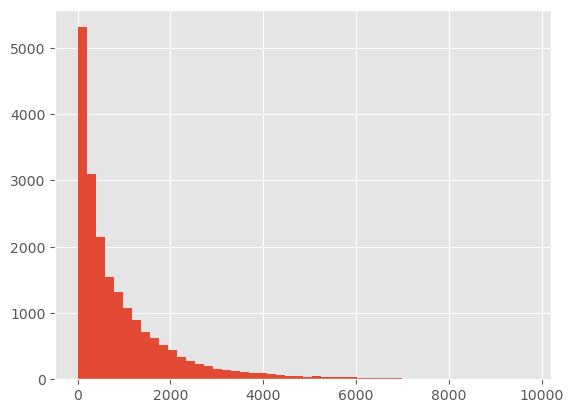

In [17]:
x = df['derived_lat_up']
plt.hist(x, bins = 50)
plt.xlabel = 'derived_lat_up'
plt.ylabel = 'frequency'

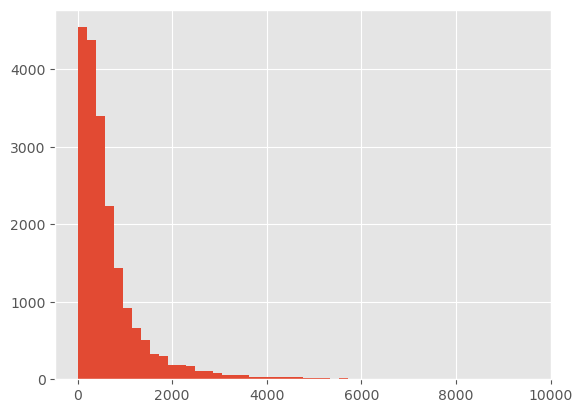

In [18]:
x = df['derived_lat_down']
plt.hist(x, bins = 50)
plt.xlabel = 'derived_lat_down'
plt.ylabel = 'frequency'

Histogram shows a consistent distribution after filling the NaN values with useful data

In [19]:
df.head(15)

,ID,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,net_type,derived_lat_down,derived_lat_up
0,0,9711,1489,21,208.0,NaN,mobile,208.0,656.0
1,1,50073,18199,40,475.0,1954.0,mobile,475.0,1954.0
2,2,21784,745,47,1493.0,2252.0,mobile,1493.0,2252.0
3,3,18159,1662,21,244.0,2067.0,mobile,244.0,2067.0
4,4,1439,659,749,2357.0,5083.0,mobile,2357.0,5083.0
5,5,13498,3525,37,598.0,1023.0,mobile,598.0,1023.0
6,6,181395,3546,19,489.0,873.0,mobile,489.0,873.0
7,7,214,117,18,22.0,32.0,mobile,22.0,32.0
8,8,31785,8471,50,NaN,NaN,mobile,22.0,32.0
9,9,12451,1797,30,NaN,NaN,mobile,22.0,32.0


In [20]:
df.describe()

,ID,avg_d_kbps,avg_u_kbps,avg_lat_ms,avg_lat_down_ms,avg_lat_up_ms,derived_lat_down,derived_lat_up
count,20000.000000,2.000000e+04,20000.000000,20000.000000,19097.000000,19127.000000,20000.000000,20000.000000
mean,9999.500000,1.095470e+05,37402.304000,34.833050,676.862177,931.673969,686.690900,946.026900
std,5773.647028,1.331239e+05,70862.574577,66.920457,832.009896,1144.083777,836.384389,1150.745251
min,0.000000,4.000000e+00,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000
25%,4999.750000,1.925750e+04,5331.000000,14.000000,207.000000,176.000000,212.000000,181.000000
50%,9999.500000,5.397650e+04,14261.000000,24.000000,432.000000,512.000000,441.000000,528.000000
75%,14999.250000,1.569445e+05,32455.000000,37.000000,802.000000,1253.000000,816.000000,1279.000000
max,19999.000000,1.969184e+06,995535.000000,2722.000000,9538.000000,9718.000000,9538.000000,9718.000000


Finding outliers

In [21]:
df_num = df.drop(columns='net_type')
df_num.skew()

#Very Positively skewed

ID                   0.000000
avg_d_kbps           2.244382
avg_u_kbps           4.355958
avg_lat_ms          13.538866
avg_lat_down_ms      3.643726
avg_lat_up_ms        2.441491
derived_lat_down     3.607413
derived_lat_up       2.429656
dtype: float64

c:\Users\Samuel\anaconda3\envs\Ct5018\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


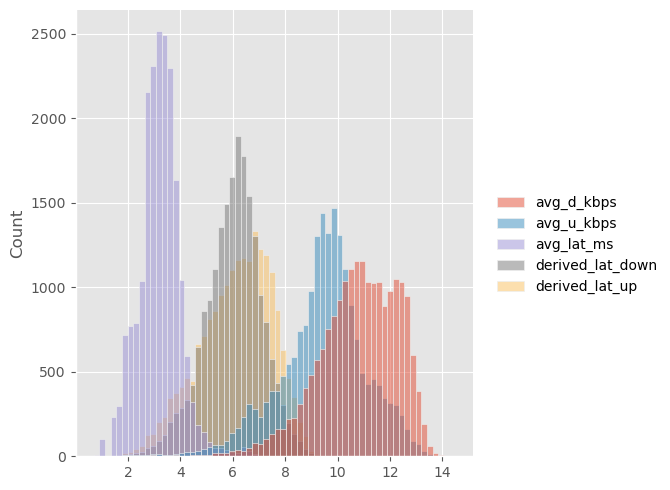

In [22]:
df_log = np.log1p(df.drop(columns=['ID', 'net_type', 'avg_lat_down_ms', 'avg_lat_up_ms']))
sns.displot(df_log)

#Distributions are now closer to normal and so outliers can now be effectivly found.


In [23]:
def upper_thresh(name):
    return df_log[name].mean() + (df_log[name].std() * 3)

bounds = [0, 0, 0, 0, 0]
columns = ['avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'derived_lat_down', 'derived_lat_up']

for i in range(5):
    bounds[i] = upper_thresh(columns[i])
 

count = 0

for i in range(len(df.index)-1, -1, -1):

    if df_log['avg_d_kbps'][i] > bounds[0]:
        df.drop(df.index[i], inplace = True)
        count += 1

    elif df_log['avg_u_kbps'][i] > bounds[1]:
        df.drop(df.index[i], inplace = True)
        count += 1

    elif df_log['avg_lat_ms'][i] > bounds[2]:
        df.drop(df.index[i], inplace = True)
        count += 1

    elif df_log['derived_lat_down'][i] > bounds[3]:
        df.drop(df.index[i], inplace = True)
        count += 1
    
    elif df_log['derived_lat_up'][i] > bounds[4]:
        df.drop(df.index[i], inplace = True)
        count += 1

df.reset_index(inplace=True, drop = True)
print('Remaining rows: ', len(df.index))
print('dropped percentage: ', round((count / 20000) * 100, 3), '%')

#Removing any outliers

Remaining rows:  19790
dropped percentage:  1.05 %


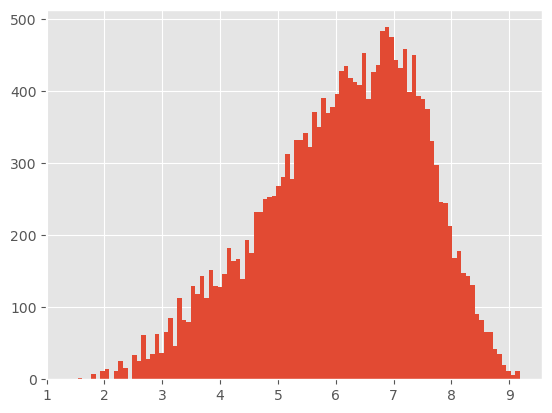

In [24]:
x = df_log['derived_lat_up']
plt.hist(x, bins = 100)
plt.xlabel = 'derived_lat_up'
plt.ylabel = 'frequency'

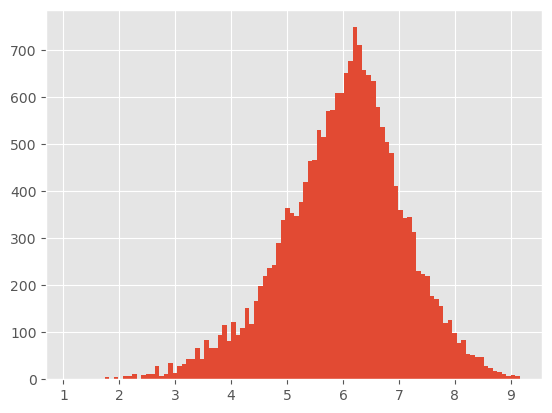

In [25]:
x = df_log['derived_lat_down']
plt.hist(x, bins = 100)
plt.xlabel = 'derived_lat_down'
plt.ylabel = 'frequency'

Now free of outliers

In [26]:
df.to_csv('clean_dataset.csv', index=False)